In [1]:
import pandas as pd
import base64
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import io

In [2]:
i=1
df=pd.read_csv("Unconfirmed200170.tsv",sep="\t" ,nrows=1,skiprows=i)
print(df)

   m.0107_f  1  \
0  m.0107_f  2   

  http://1.bp.blogspot.com/-HNFIL7eKdNs/TxnlvZvisvI/AAAAAAAAANE/AsNempI4Efc/s1600/magicalex.jpg  \
0  http://www.magicalex.cz/wp-content/gallery/kou...                                              

  http://plasticineportal.blogspot.com/2012/01/magic-alexs-statement.html  \
0               http://www.magicalex.cz/fotogalerie/                        

   FaceId-0  voT2Po1YFz5oL0E/qqqqPg==  \
0  FaceId-0  SLTCPgAAqD51oxg/mpnxPg==   

  /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAQCAwMDAgQDAwMEBAQEBQkGBQUFBQsICAYJDQsNDQ0LDAwOEBQRDg8TDwwMEhgSExUWFxcXDhEZGxkWGhQWFxb/2wBDAQQEBAUFBQoGBgoWDwwPFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhb/wAARCABqAFsDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6

In [27]:
df.shape

(1, 7)

In [28]:
df.iloc[0][2]

'http://www.magicalex.cz/wp-content/gallery/kouzla/magic_alex.jpg'

In [3]:
def stringToRGB(base64_string):
    imgdata = base64.b64decode(str(base64_string))
    img = Image.open(io.BytesIO(imgdata))
    opencv_img= cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)
    opencv_img = cv2.resize(opencv_img, (224,224))
    return opencv_img 

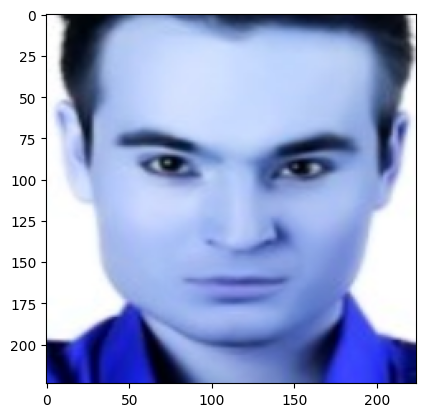

In [4]:
img=stringToRGB(df.iloc[0][6])
plt.imshow(img)
plt.show()

In [36]:
k=1

In [5]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [6]:
pretrained_model = tf.keras.applications.DenseNet201(
            include_top=False ,
            weights='imagenet', #tuning10 weights='noisy-student' instead of 'imagenet'
                                #Self-training with Noisy Student improves ImageNet classification https://arxiv.org/abs/1911.04252) 
            #pooling='avg', #tuning1
            input_shape=[224,224, 3]
        )

pretrained_model.trainable = True #tuning8 pretrained_model.trainable = True

model = tf.keras.Sequential([
            pretrained_model, #Base pretrained on ImageNet to extract features from images

            tf.keras.layers.GlobalAveragePooling2D(), ##Attach a new head to act as a classifier
            #tf.keras.layers.Dropout(0.3), #tuning3
            tf.keras.layers.Dense(100, activation='softmax')
        ])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.compile(optimizer='adam'
,loss='sparse_categorical_crossentropy'
,metrics=['sparse_categorical_accuracy'],
)

   m.0107_f  30  \
0  m.0107_f  31   

  http://media-cache-ak0.pinimg.com/736x/55/f4/11/55f4114b7293bf7923bf310669eb899f.jpg  \
0  http://cache4.asset-cache.net/gc/451438646-ale...                                     

  http://pinterest.com/pin/68539225549579903/  FaceId-0  \
0  http://bookcoverimgs.com/magic-alex-tanas/  FaceId-0   

   r+u6PoyveD5jMiY/tUYrPw==  \
0  TsFLPrV+pT54OUU/REkzPw==   

  /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAQCAwMDAgQDAwMEBAQEBQkGBQUFBQsICAYJDQsNDQ0LDAwOEBQRDg8TDwwMEhgSExUWFxcXDhEZGxkWGhQWFxb/2wBDAQQEBAUFBQoGBgoWDwwPFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhb/wAARCAEhAPcDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3

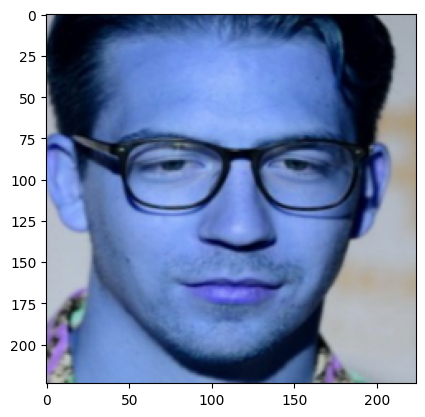

TypeError: fit_generator() got an unexpected keyword argument 'batch_size'

In [49]:
import itertools

def generator(feat, labels, batch_size):
    pairs = [(x, y) for x in feat for y in labels]
    cycle_pairs = itertools.cycle(pairs)
    while (True):
        x = []
        y = []
        for _ in range(batch_size):
            f, p = next(cycle_pairs)
            x.append(f)
            y.append(p)
        yield np.array(x), np.array(y)


In [8]:
k=0
for j in range(20):
    df=pd.read_csv("Unconfirmed200170.tsv",sep="\t" ,nrows=5,skiprows=k)
    # print(df)
    k=k+5
    
    img=stringToRGB(df.iloc[0][6])
    z=((stringToRGB(df.iloc[0][6]),0) for i in range(1))
    # print(type(z))
    # print(z.__next__())
    # plt.imshow(img)
    # plt.show()
    y=[1]
    # X,l=generator(df.iloc[0][6],y,1)
    # model.fit_generator(z.flow(trainx,),steps_per_epoch=1)
    # model.train_on_batch(np.reshape(stringToRGB(df.iloc[0][6]),(1,224,224,3)), y)
    model.fit(np.reshape(stringToRGB(df.iloc[0][6]),(1,224,224,3)), y)
print(k)

Train on 1 samples
1/1 [==============================] - 18s 18s/sample - loss: 5.0932 - sparse_categorical_accuracy: 0.0000e+00
Train on 1 samples
1/1 [==============================] - 2s 2s/sample - loss: 3.8312 - sparse_categorical_accuracy: 0.0000e+00
Train on 1 samples
1/1 [==============================] - 2s 2s/sample - loss: 2.5784 - sparse_categorical_accuracy: 1.0000
Train on 1 samples
1/1 [==============================] - 2s 2s/sample - loss: 1.4912 - sparse_categorical_accuracy: 1.0000
Train on 1 samples
1/1 [==============================] - 2s 2s/sample - loss: 0.6248 - sparse_categorical_accuracy: 1.0000
Train on 1 samples
1/1 [==============================] - 2s 2s/sample - loss: 0.2177 - sparse_categorical_accuracy: 1.0000
Train on 1 samples
1/1 [==============================] - 2s 2s/sample - loss: 0.0716 - sparse_categorical_accuracy: 1.0000
Train on 1 samples
1/1 [==============================] - 2s 2s/sample - loss: 0.0302 - sparse_categorical_accuracy: 1.000

In [93]:
df=pd.read_csv("Unconfirmed200170.tsv",sep="\t" ,nrows=1,skiprows=3)
img=stringToRGB(df.iloc[0][6])
print(model.predict(np.reshape(stringToRGB(df.iloc[0][6]),(1,224,224,3))))


[[1.83507601e-23 1.00000000e+00 1.18647194e-19 6.02906175e-25
  3.15890931e-22 4.88389768e-18 3.86759806e-24 2.73736192e-18
  2.04060097e-17 9.74071572e-21 3.49553053e-20 1.43448547e-21
  1.02461029e-20 1.73372079e-23 1.22522400e-25 7.70674140e-22
  1.13836192e-20 5.90623378e-23 5.93076599e-26 5.28063434e-17
  1.01453590e-22 9.97215605e-23 2.82556977e-18 7.39975975e-19
  1.27660691e-22 4.59798166e-19 1.25468807e-22 2.49403534e-23
  6.33430971e-24 7.45682578e-20 3.22750510e-18 4.84268406e-22
  7.54709251e-18 2.20913037e-22 1.73066395e-20 1.91390075e-22
  1.29179447e-20 1.46339438e-18 5.54293494e-23 1.42257462e-19
  5.67370110e-19 4.70135632e-16 2.98071852e-20 1.04116538e-22
  4.86485722e-18 1.11082653e-19 5.62365497e-23 9.41516118e-22
  1.29496951e-16 6.35213974e-25 2.95337867e-24 1.14421444e-18
  4.42590845e-24 2.78393181e-16 3.91751954e-24 3.24719766e-21
  1.00586431e-24 2.85898349e-27 1.73797066e-17 9.82003459e-21
  2.63397179e-18 2.30885399e-20 2.06689559e-22 9.91518199e-23
  6.4202

In [116]:
df=pd.read_csv("Unconfirmed200170.tsv",sep="\t" ,nrows=1,skiprows=10)
y=df.iloc[0][1]
print(y)
# keras.utils.to_categorical(y,100)

9


In [65]:
a=np.zeros(8000000)